In [2]:
import numpy as np

#randomly generate data
N = 2 # number of training sample
d = 2 # data dimension
C = 3 # number of classes

X = np.random.randn(d, N)
y = np.random.randint(0, 3, (N,))
print(X)
print(y)

[[-0.45801949  0.70267848]
 [-0.79931721  0.45657653]]
[2 0]


In [11]:
# matrix one hot coding
from scipy import sparse
def convert_labels(y, C = C):
    Y = sparse.coo_matrix((np.ones_like(y),
                          (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    print(Y)
    return Y
Y = convert_labels(y, C)

[[0 1]
 [0 0]
 [1 0]]


In [4]:
def softmax_stable(Z):
    e_Z = np.exp(Z- np.max(Z, axis= 0, keepdims= True))
    A = e_Z/e_Z.sum(axis = 0)
    # axis = 0 nghia la lay max theo cot, keepdims = True de dam bao phep tru ma tran duoc thuc hien
    return A
def softmax(Z):
    e_Z = np.exp(Z)
    A = e_Z/e_Z.sum(axis = 0)
    return A


In [5]:
# cost or loss function
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))
W_init = np.random.randn(d, C)

def grad(X, Y, W):
    A = softmax(W.T.dot(X))
    E = A-Y
    return X.dot(E.T)
def numerical_grad(X, Y, W, cost):
    eps = 1e-6
    g = np.zeros_like(W)
    for i in range(W.shape[0]):
         for j in range(W.shape[1]):
            W_p = W.copy()
            W_n = W.copy()
            W_p[i, j] += eps 
            W_n[i, j] -= eps
            g[i,j] = (cost(X, Y, W_p) - cost(X, Y, W_n))/(2*eps)
    return g 

g1 = grad(X, Y, W_init)
g2 = numerical_grad(X, Y, W_init, cost)

print(np.linalg.norm(g1 - g2))

2.1513119998462616e-10


In [8]:
def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    
    count = 0
    check_w_after = 20
    while count < max_count:
        #mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d,1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi-ai).T)
            count+=1
            #stop
            if count%check_w_after == 0:
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W
eta = .05
d = X.shape[0]
W_init = np.random.randn(d, C)

W = softmax_regression(X, y, W_init, eta)
print(W[-1])

[[ 3.39069322 -2.61769193 -3.61173159]
 [ 3.06892757  0.58568307 -5.71132348]]


In [10]:
def pred(W, X):
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis= 0)
print(pred(W[-1], X))

[2 0]


Example

In [17]:
means = [[2,2], [8,3], [3,6]]
cov = [[1,0], [0,1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0).T
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)
C = 3

original_label = np.asarray([0]*N+[1]*N+[2]*N).T

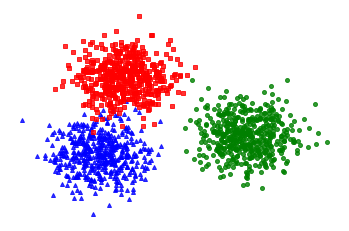

In [18]:
import matplotlib.pyplot as plt
def display(X, label):
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    
    plt.plot(X0[0,:], X0[1,:], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0,:], X1[1,:], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0,:], X2[1,:], 'rs', markersize = 4, alpha = .8)
    
    plt.axis('off')
    plt.plot()
    plt.show()
    
display(X[1:, :], original_label)

In [19]:
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, eta)
print(W[-1])


0
[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 1]]
[[ 7.81660818 -3.76892982 -4.47075726]
 [-1.80150528  0.51750167 -2.06714517]
 [-0.76375042 -0.65592783  2.3849074 ]]


In [24]:
xm = np.arange(-2,11,0.025)
xlen = len(xm)
ym = np.arange(-3,10, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm,ym)

print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)

print(XX.shape)

Z = pred(W[-1], XX)
print(Z)

(1, 270400)
(3, 270400)
[0 0 0 ... 2 2 2]


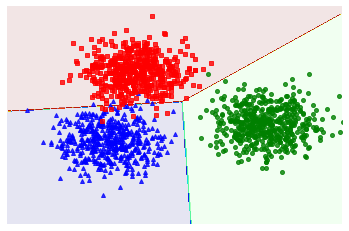

In [27]:
Z = Z.reshape(xx.shape)

CS = plt.contourf(xx, yy, Z, 200, cmap = 'jet', alpha = .1)

plt.xlim(-2, 11)
plt.ylim(-3, 10)
plt.xticks(())
plt.yticks(())

display(X[1:, :], original_label)
plt.show()


In [33]:
#RESET
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score

mntrain = MNIST('../kmeans_cluster/asset/MNIST/')
mntrain.load_training()
Xtrain = np.asarray(mntrain.train_images)/255.0
ytrain = np.array(mntrain.train_labels.tolist())

mntest = MNIST('../kmeans_cluster/asset/MNIST/')
mntest.load_testing()
Xtest = np.asarray(mntest.test_images)/255.0
ytest = np.array(mntest.test_labels.tolist())

logreg = linear_model.LogisticRegression(C = 1e5, 
                    solver = 'lbfgs', multi_class = 'multinomial')
logreg.fit(Xtrain, ytrain)

y_pred = logreg.predict(Xtest)
print("Accuracy: %.2f %%" %(100*accuracy_score(ytest, y_pred.tolist()))
)

Accuracy: 92.52 %


c:\users\huyho\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
Xtrain = np.concatenate((np.ones((Xtrain.shape[0], 1))/255.0, Xtrain), axis = 1)
Xtest = np.concatenate((np.ones((Xtest.shape[0], 1))/255.0, Xtest), axis = 1)



In [36]:
logreg = linear_model.LogisticRegression(C=1e5, solver = 'lbfgs', multi_class = 'multinomial')
logreg.fit(Xtrain, ytrain)

y_pred = logreg.predict(Xtest)
print("Accuracy: %.2f %%" %(100*accuracy_score(ytest, y_pred.tolist())))

Accuracy: 92.57 %


c:\users\huyho\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
